# 1. Exploración de datos && preprocesamiento de imágenes

In [21]:
# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image # Pillow for image loading and manipulation
import random

In [22]:
# Configure visualization style
sns.set_style("whitegrid")



In [23]:
# Define base path relative to the notebook location
BASE_DATA_PATH = "../data/"
IMAGE_PATH = os.path.join(BASE_DATA_PATH, "images-small")

In [24]:
# Define CSV file paths
train_csv_path = os.path.join(BASE_DATA_PATH, "train-small.csv")
valid_csv_path = os.path.join(BASE_DATA_PATH, "valid-small.csv")
test_csv_path = os.path.join(BASE_DATA_PATH, "test.csv") # Assuming test.csv is also in BASE_DATA_PATH

In [25]:
# Load the dataframes
try:
    train_df = pd.read_csv(train_csv_path)
    valid_df = pd.read_csv(valid_csv_path)
    test_df = pd.read_csv(test_csv_path)
    print("Archivos CSV cargados exitosamente.")
except FileNotFoundError as e:
    print(f"Error: No se encontró el archivo CSV: {e}")
    print(f"Asegúrate de que los archivos estén en la carpeta '{BASE_DATA_PATH}'")
    # Stop execution if files are not found
    raise e


Archivos CSV cargados exitosamente.


In [26]:
# Display basic information about the training data
print("--- Información del Conjunto de Entrenamiento (train-small.csv) ---")
print(f"Forma (Shape): {train_df.shape}")
print("\nPrimeras 5 filas:")
display(train_df.head()) # Use display() in Jupyter for better rendering
print("\nInformación de Columnas y Tipos de Datos:")
train_df.info()
print("\nEstadísticas Descriptivas (si aplica):")
# display(train_df.describe()) # Useful if there are numerical columns like Age

--- Información del Conjunto de Entrenamiento (train-small.csv) ---
Forma (Shape): (1000, 16)

Primeras 5 filas:


,Image,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,PatientId,Pleural_Thickening,Pneumonia,Pneumothorax
0,00008270_015.png,0,0,0,0,0,0,0,0,0,0,0,8270,0,0,0
1,00029855_001.png,1,0,0,0,1,0,0,0,1,0,0,29855,0,0,0
2,00001297_000.png,0,0,0,0,0,0,0,0,0,0,0,1297,1,0,0
3,00012359_002.png,0,0,0,0,0,0,0,0,0,0,0,12359,0,0,0
4,00017951_001.png,0,0,0,0,0,0,0,0,1,0,0,17951,0,0,0



Información de Columnas y Tipos de Datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Image               1000 non-null   object
 1   Atelectasis         1000 non-null   int64 
 2   Cardiomegaly        1000 non-null   int64 
 3   Consolidation       1000 non-null   int64 
 4   Edema               1000 non-null   int64 
 5   Effusion            1000 non-null   int64 
 6   Emphysema           1000 non-null   int64 
 7   Fibrosis            1000 non-null   int64 
 8   Hernia              1000 non-null   int64 
 9   Infiltration        1000 non-null   int64 
 10  Mass                1000 non-null   int64 
 11  Nodule              1000 non-null   int64 
 12  PatientId           1000 non-null   int64 
 13  Pleural_Thickening  1000 non-null   int64 
 14  Pneumonia           1000 non-null   int64 
 15  Pneumothorax        1000 non-n

In [27]:
# Display basic information about the validation data
print("\n--- Información del Conjunto de Validación (valid-small.csv) ---")
print(f"Forma (Shape): {valid_df.shape}")
display(valid_df.head())


--- Información del Conjunto de Validación (valid-small.csv) ---
Forma (Shape): (200, 16)


,Image,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,PatientId,Pleural_Thickening,Pneumonia,Pneumothorax
0,00008270_015.png,0,0,0,0,0,0,0,0,0,0,0,8270,0,0,0
1,00029855_001.png,1,0,0,0,1,0,0,0,1,0,0,29855,0,0,0
2,00001297_000.png,0,0,0,0,0,0,0,0,0,0,0,1297,1,0,0
3,00012359_002.png,0,0,0,0,0,0,0,0,0,0,0,12359,0,0,0
4,00017951_001.png,0,0,0,0,0,0,0,0,1,0,0,17951,0,0,0


In [28]:
# Display basic information about the test data
print("\n--- Información del Conjunto de Prueba (test.csv) ---")
print(f"Forma (Shape): {test_df.shape}")
display(test_df.head())


--- Información del Conjunto de Prueba (test.csv) ---
Forma (Shape): (420, 16)


,Image,PatientId,Cardiomegaly,Emphysema,Effusion,Hernia,Infiltration,Mass,Nodule,Atelectasis,Pneumothorax,Pleural_Thickening,Pneumonia,Fibrosis,Edema,Consolidation
0,00021463_005.png,21463,0,0,1,1,1,0,0,1,0,0,0,0,1,0
1,00019733_002.png,19733,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,00021463_001.png,21463,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,00017136_020.png,17136,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,00027477_000.png,27477,0,0,0,1,1,0,0,0,0,0,0,0,0,0


In [29]:
# Check for missing values in the training set
print("\n--- Valores Faltantes (Missing Values) en Entrenamiento ---")
missing_values = train_df.isnull().sum()
print(missing_values[missing_values > 0]) # Show only columns with missing values
if missing_values.sum() == 0:
    print("No hay valores faltantes en el conjunto de entrenamiento.")



--- Valores Faltantes (Missing Values) en Entrenamiento ---
Series([], dtype: int64)
No hay valores faltantes en el conjunto de entrenamiento.


In [30]:
# Identify label columns (assuming they are the columns other than Image Index, Patient ID, etc.)
# Adjust this list based on the actual column names in your CSV files
potential_label_cols = [col for col in train_df.columns if col not in ['Image Index', 'Patient ID', 'Finding Labels', 'Follow-up #', 'Patient Age', 'Patient Gender', 'View Position']] # Example non-label columns
# Or, if you know the exact 14 pathology names, list them explicitly:
label_cols = [
    'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion',
    'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule',
    'Pleural_Thickening', 'Pneumonia', 'Pneumothorax'
] # Assuming these are the column names

# Verify the label columns exist in the dataframe
actual_label_cols = [col for col in label_cols if col in train_df.columns]
print(f"Columnas de etiquetas identificadas ({len(actual_label_cols)}): {actual_label_cols}")

# Ensure all expected label columns are present
if len(actual_label_cols) != len(label_cols):
     print("\n¡Advertencia! No todas las columnas de etiquetas esperadas se encontraron en el DataFrame.")
     missing_cols = set(label_cols) - set(actual_label_cols)
     print(f"Columnas faltantes: {missing_cols}")

Columnas de etiquetas identificadas (14): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


In [31]:
# Calculate the frequency of each pathology in the training set
print("\n--- Distribución de Patologías (Casos Positivos) en Entrenamiento ---")
label_counts = train_df[actual_label_cols].sum().sort_values(ascending=False)
print(label_counts)


--- Distribución de Patologías (Casos Positivos) en Entrenamiento ---
Infiltration          175
Effusion              128
Atelectasis           106
Nodule                 54
Mass                   45
Pneumothorax           38
Consolidation          33
Pleural_Thickening     21
Cardiomegaly           20
Edema                  16
Fibrosis               14
Emphysema              13
Pneumonia              10
Hernia                  2
dtype: int64


C:\Users\ULTRA\AppData\Local\Temp\ipykernel_55500\1468250411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


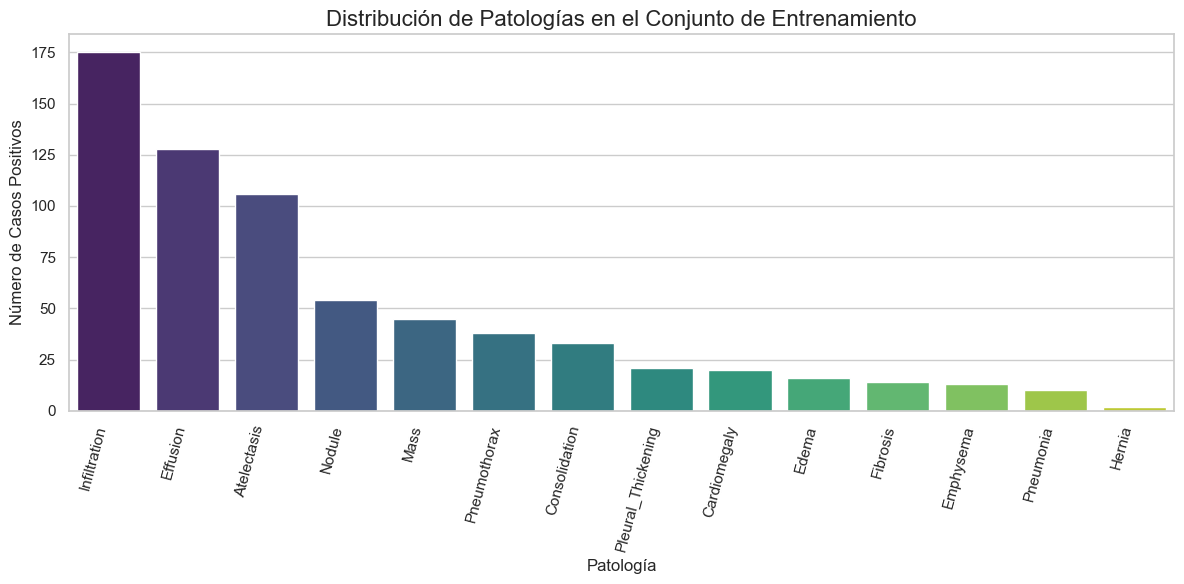


Observaciones:
- Existe un desbalance significativo entre las clases. 'Infiltration', 'Effusion', 'Atelectasis' son más comunes.
- Patologías como 'Hernia' son muy raras en este subconjunto.
- Este desbalance deberá ser considerado durante el entrenamiento del modelo (ej. usando pesos de clase, over/undersampling).


In [32]:
# Visualize the label distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.title('Distribución de Patologías en el Conjunto de Entrenamiento', fontsize=16)
plt.xlabel('Patología', fontsize=12)
plt.ylabel('Número de Casos Positivos', fontsize=12)
plt.xticks(rotation=75, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout
plt.show()

print("\nObservaciones:")
print("- Existe un desbalance significativo entre las clases. 'Infiltration', 'Effusion', 'Atelectasis' son más comunes.")
print("- Patologías como 'Hernia' son muy raras en este subconjunto.")
print("- Este desbalance deberá ser considerado durante el entrenamiento del modelo (ej. usando pesos de clase, over/undersampling).")


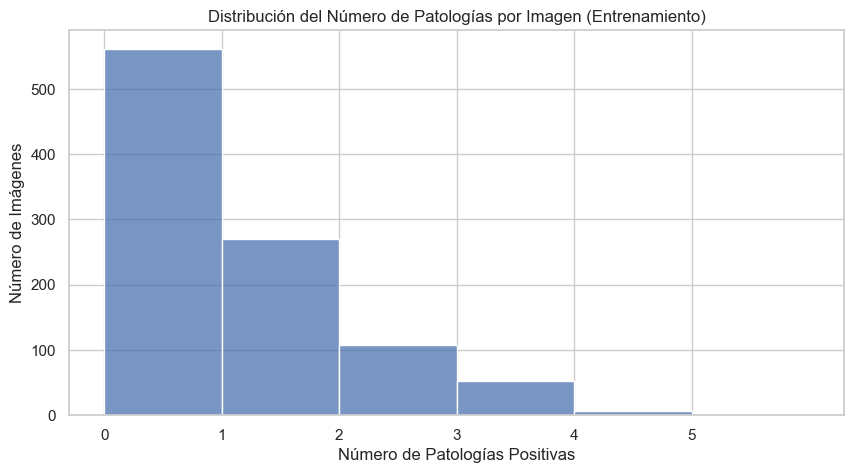


Número promedio de patologías por imagen: 0.68
Número máximo de patologías en una imagen: 5
Número de imágenes sin ninguna patología detectada (según etiquetas): 562


In [33]:
# Analyze how many labels each image has
labels_per_image = train_df[actual_label_cols].sum(axis=1)

plt.figure(figsize=(10, 5))
sns.histplot(labels_per_image, bins=range(labels_per_image.max() + 2), kde=False)
plt.title('Distribución del Número de Patologías por Imagen (Entrenamiento)')
plt.xlabel('Número de Patologías Positivas')
plt.ylabel('Número de Imágenes')
plt.xticks(range(labels_per_image.max() + 1))
plt.show()

print(f"\nNúmero promedio de patologías por imagen: {labels_per_image.mean():.2f}")
print(f"Número máximo de patologías en una imagen: {labels_per_image.max()}")
print(f"Número de imágenes sin ninguna patología detectada (según etiquetas): {(labels_per_image == 0).sum()}")



In [34]:
# Construct full image paths
# Assuming the image filenames are in the 'Image Index' column
image_col = 'Image' # Verify this is the correct column name

if image_col not in train_df.columns:
    print(f"Error: La columna '{image_col}' no se encuentra en el DataFrame de entrenamiento.")
    # Handle error appropriately, maybe try another common name or stop
    raise KeyError(f"Columna '{image_col}' no encontrada.")

# Create a full path column (optional, but helpful)
train_df['FullPath'] = train_df[image_col].apply(lambda x: os.path.join(IMAGE_PATH, x))
valid_df['FullPath'] = valid_df[image_col].apply(lambda x: os.path.join(IMAGE_PATH, x))
test_df['FullPath'] = test_df[image_col].apply(lambda x: os.path.join(IMAGE_PATH, x))

# Verify a few paths
print("\nVerificando rutas de imágenes de ejemplo:")
for i in range(3):
    idx = random.randint(0, len(train_df) - 1)
    img_path = train_df.loc[idx, 'FullPath']
    print(f"- Ruta: {img_path}")
    print(f"  ¿Existe?: {os.path.exists(img_path)}")



Verificando rutas de imágenes de ejemplo:
- Ruta: ../data/images-small\00025238_004.png
  ¿Existe?: True
- Ruta: ../data/images-small\00005416_001.png
  ¿Existe?: True
- Ruta: ../data/images-small\00017231_000.png
  ¿Existe?: True



--- Ejemplos de Imágenes y Etiquetas (Entrenamiento) ---


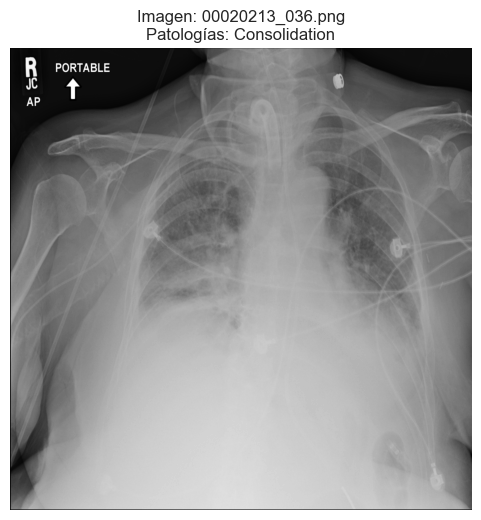

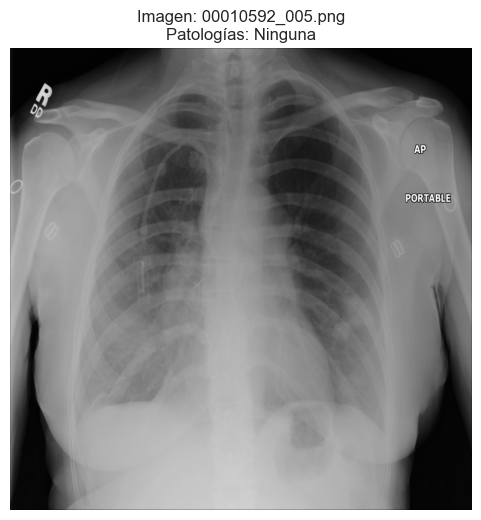

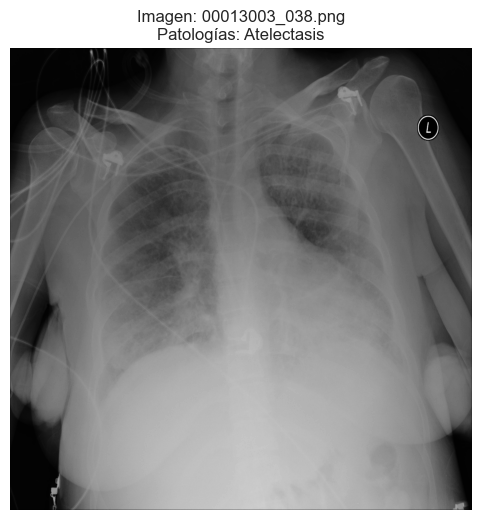

In [35]:
# Function to display images with labels
def show_image_with_labels(index, df, label_cols_list):
    """Muestra una imagen y sus etiquetas asociadas."""
    img_path = df.loc[index, 'FullPath']
    if not os.path.exists(img_path):
        print(f"Imagen no encontrada en: {img_path}")
        return

    # Load image using Pillow
    try:
        img = Image.open(img_path).convert('L') # Convert to grayscale ('L')
    except Exception as e:
        print(f"Error al cargar la imagen {img_path}: {e}")
        return

    # Get labels for this image
    labels = df.loc[index, label_cols_list]
    positive_labels = labels[labels == 1].index.tolist()

    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray') # Display in grayscale
    plt.title(f"Imagen: {df.loc[index, image_col]}\nPatologías: {', '.join(positive_labels) if positive_labels else 'Ninguna'}")
    plt.axis('off') # Hide axes
    plt.show()

# Display a few random examples from the training set
print("\n--- Ejemplos de Imágenes y Etiquetas (Entrenamiento) ---")
for _ in range(3):
    random_idx = random.randint(0, len(train_df) - 1)
    show_image_with_labels(random_idx, train_df, actual_label_cols)


--- Ejemplos de Imágenes y Etiquetas (Entrenamiento) ---


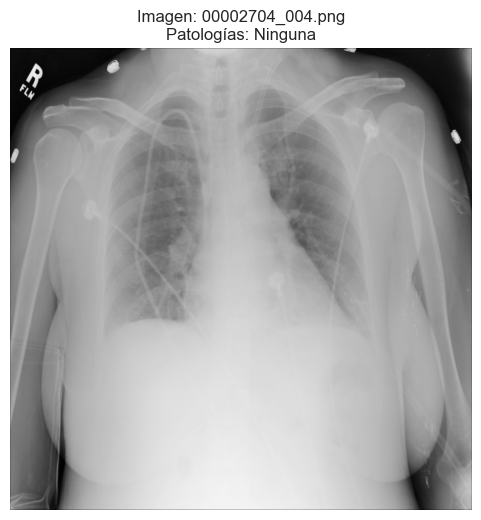

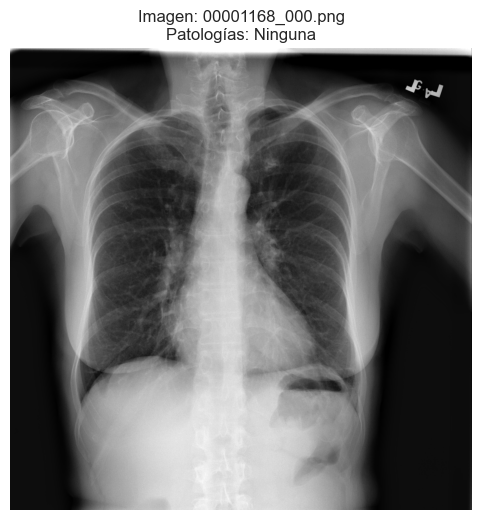

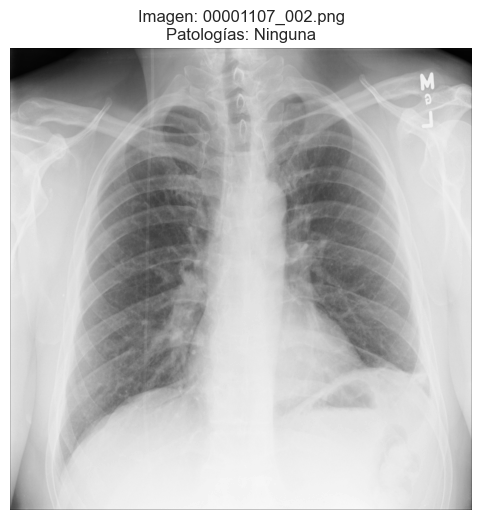

In [36]:
# Display a few random examples from the training set
print("\n--- Ejemplos de Imágenes y Etiquetas (Entrenamiento) ---")
for _ in range(3):
    random_idx = random.randint(0, len(train_df) - 1)
    show_image_with_labels(random_idx, train_df, actual_label_cols)

In [37]:
# Check image dimensions and pixel intensity range
print("\n--- Análisis de Dimensiones y Píxeles ---")
sample_dims = []
pixel_means = []
pixel_stds = []
num_check_images = 20 # Check a small sample

for i in range(min(num_check_images, len(train_df))):
    img_path = train_df.loc[i, 'FullPath']
    if os.path.exists(img_path):
        try:
            img = Image.open(img_path).convert('L')
            img_array = np.array(img)
            sample_dims.append(img_array.shape)
            pixel_means.append(img_array.mean())
            pixel_stds.append(img_array.std())
        except Exception as e:
            print(f"Advertencia: No se pudo procesar la imagen {img_path}: {e}")

if sample_dims:
    unique_dims = set(sample_dims)
    print(f"Dimensiones encontradas en la muestra ({len(sample_dims)} imágenes): {unique_dims}")
    if len(unique_dims) > 1:
        print("¡Las imágenes tienen diferentes dimensiones! Se requerirá redimensionamiento.")
    else:
        print("Las imágenes de la muestra tienen dimensiones consistentes.")

    print(f"Rango aproximado de Intensidad de Píxeles (Media ± Std Dev):")
    print(f"- Media: {np.mean(pixel_means):.2f} ± {np.std(pixel_means):.2f}")
    print(f"- Desv. Estándar: {np.mean(pixel_stds):.2f} ± {np.std(pixel_stds):.2f}")
    print(f"(Basado en una muestra de {len(sample_dims)} imágenes)")
else:
    print("No se pudieron cargar imágenes de muestra para analizar dimensiones/píxeles.")


--- Análisis de Dimensiones y Píxeles ---
Dimensiones encontradas en la muestra (20 imágenes): {(1024, 1024)}
Las imágenes de la muestra tienen dimensiones consistentes.
Rango aproximado de Intensidad de Píxeles (Media ± Std Dev):
- Media: 129.23 ± 21.20
- Desv. Estándar: 59.95 ± 9.67
(Basado en una muestra de 20 imágenes)


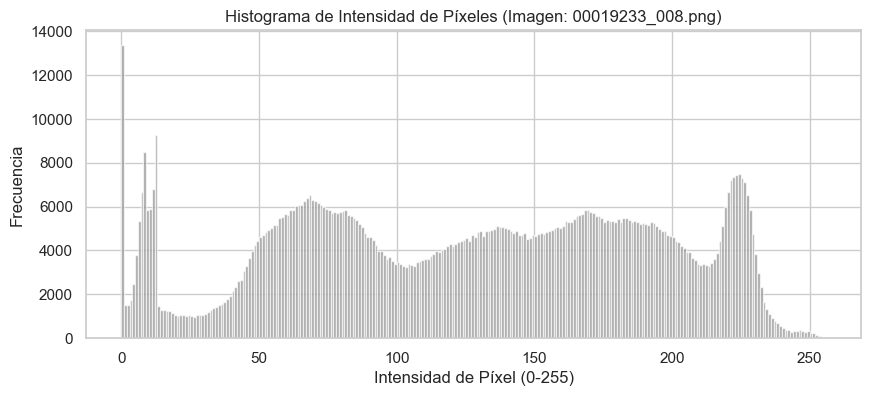

In [38]:
# Visualize pixel intensity distribution for a sample image
if sample_dims: # Only plot if images were loaded
    plt.figure(figsize=(10, 4))
    random_idx_hist = random.randint(0, len(train_df) - 1)
    img_path_hist = train_df.loc[random_idx_hist, 'FullPath']
    if os.path.exists(img_path_hist):
        try:
            img_hist = Image.open(img_path_hist).convert('L')
            img_array_hist = np.array(img_hist)

            plt.hist(img_array_hist.ravel(), bins=256, range=(0, 256), color='gray', alpha=0.7)
            plt.title(f'Histograma de Intensidad de Píxeles (Imagen: {train_df.loc[random_idx_hist, image_col]})')
            plt.xlabel('Intensidad de Píxel (0-255)')
            plt.ylabel('Frecuencia')
            plt.show()
        except Exception as e:
            print(f"No se pudo generar histograma para {img_path_hist}: {e}")

## 6. Implementación del Preprocesamiento y Aumento de Datos con Keras


In [39]:
# Import TensorFlow and Keras components
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [40]:
# Definir parámetros para el preprocesamiento
IMG_HEIGHT = 224 # Altura deseada de la imagen
IMG_WIDTH = 224  # Anchura deseada de la imagen
BATCH_SIZE = 32  # Tamaño del lote para el entrenamiento y evaluación

# Crear generador de datos para ENTRENAMIENTO con Aumento de Datos
print("Creando generador de datos para Entrenamiento (con aumento)...")
train_datagen = ImageDataGenerator(
    rescale=1./255,         # Normalización: Escalar píxeles a [0, 1]
    rotation_range=15,      # Rotación aleatoria hasta 15 grados
    width_shift_range=0.1,  # Desplazamiento horizontal aleatorio (10% del ancho)
    height_shift_range=0.1, # Desplazamiento vertical aleatorio (10% del alto)
    shear_range=0.1,        # Inclinación aleatoria
    zoom_range=0.1,         # Zoom aleatorio
    horizontal_flip=True,   # Volteo horizontal aleatorio
    fill_mode='nearest'     # Estrategia para rellenar píxeles nuevos tras transformaciones
)

# Crear generador de datos para VALIDACIÓN y PRUEBA (¡SIN Aumento de Datos!)
# Solo necesitamos aplicar el reescalado (normalización)
print("Creando generador de datos para Validación/Prueba (solo reescalado)...")
val_test_datagen = ImageDataGenerator(
    rescale=1./255          # Normalización: Escalar píxeles a [0, 1]
)


Creando generador de datos para Entrenamiento (con aumento)...
Creando generador de datos para Validación/Prueba (solo reescalado)...


In [41]:
# Crear los generadores que leen desde el DataFrame
print("\nConfigurando generadores flow_from_dataframe...")

try:
    # Generador de Entrenamiento
    train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_df,
        directory=None, # Las rutas ya están en la columna 'FullPath'
        x_col='FullPath',           # Columna con las rutas completas a las imágenes
        y_col=actual_label_cols,    # Lista de columnas de etiquetas (patologías)
        target_size=(IMG_HEIGHT, IMG_WIDTH), # Tamaño al que redimensionar las imágenes
        color_mode='grayscale',     # Cargar imágenes en escala de grises
        class_mode='raw',           # Para regresión o multi-label con valores numéricos directos
        batch_size=BATCH_SIZE,
        shuffle=True                # Mezclar los datos en cada época (importante para entrenamiento)
    )
    print("Generador de Entrenamiento creado.")

    # Generador de Validación
    validation_generator = val_test_datagen.flow_from_dataframe(
        dataframe=valid_df,
        directory=None,
        x_col='FullPath',
        y_col=actual_label_cols,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        color_mode='grayscale',
        class_mode='raw',
        batch_size=BATCH_SIZE,
        shuffle=False               # No mezclar los datos de validación
    )
    print("Generador de Validación creado.")

    # Generador de Prueba
    test_generator = val_test_datagen.flow_from_dataframe(
        dataframe=test_df,
        directory=None,
        x_col='FullPath',
        y_col=actual_label_cols,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        color_mode='grayscale',
        class_mode='raw',
        batch_size=BATCH_SIZE,
        shuffle=False               # No mezclar los datos de prueba
    )
    print("Generador de Prueba creado.")

except Exception as e:
    print(f"\nError al crear los generadores flow_from_dataframe: {e}")
    print("Verifica las rutas de las imágenes, los nombres de columnas y si las imágenes existen.")
    # Considerar detener la ejecución si los generadores fallan
    # raise e




Configurando generadores flow_from_dataframe...
Found 1000 validated image filenames.
Generador de Entrenamiento creado.
Found 200 validated image filenames.
Generador de Validación creado.
Found 420 validated image filenames.
Generador de Prueba creado.


## 7. Inspeccionar la Salida del Generador (Entrenamiento)



Obteniendo un lote del generador de entrenamiento para inspección...
Forma del lote de imágenes: (32, 224, 224, 1)
Forma del lote de etiquetas: (32, 14)
Rango de píxeles (min, max): (0.00, 1.00)

Etiquetas del primer elemento del lote:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0]


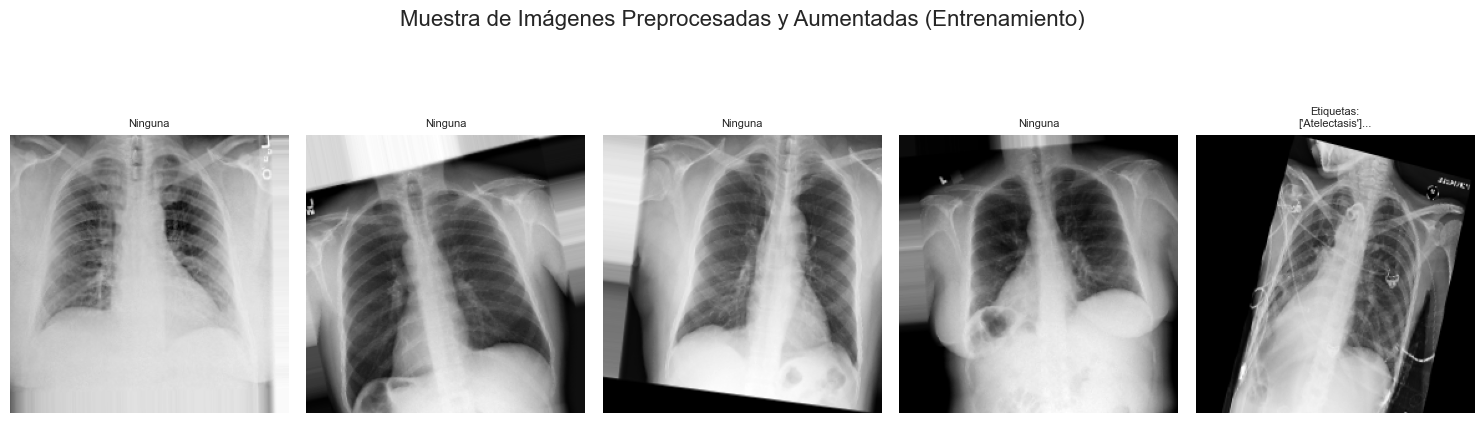

In [42]:
# Obtener un lote de datos del generador de entrenamiento
if 'train_generator' in locals(): # Check if generator was created successfully
    print("\nObteniendo un lote del generador de entrenamiento para inspección...")
    try:
        sample_batch_images, sample_batch_labels = next(train_generator)

        print(f"Forma del lote de imágenes: {sample_batch_images.shape}") # (BATCH_SIZE, IMG_HEIGHT, IMG_WIDTH, 1) -> 1 canal para grayscale
        print(f"Forma del lote de etiquetas: {sample_batch_labels.shape}") # (BATCH_SIZE, num_labels)
        print(f"Rango de píxeles (min, max): ({sample_batch_images.min():.2f}, {sample_batch_images.max():.2f})") # Debería estar cerca de [0, 1]
        print("\nEtiquetas del primer elemento del lote:")
        print(sample_batch_labels[0])

        # Visualizar algunas imágenes del lote
        num_images_to_show = 5
        plt.figure(figsize=(15, 5))
        plt.suptitle("Muestra de Imágenes Preprocesadas y Aumentadas (Entrenamiento)", fontsize=16)
        for i in range(min(num_images_to_show, BATCH_SIZE)):
            plt.subplot(1, num_images_to_show, i + 1)
            # Acceder a la imagen y quitar la dimensión del canal (squeeze)
            img_display = np.squeeze(sample_batch_images[i], axis=-1)
            plt.imshow(img_display, cmap='gray')
            plt.title(f"Etiquetas:\n{np.array(actual_label_cols)[sample_batch_labels[i].astype(bool)].tolist()[:2]}..." if any(sample_batch_labels[i]) else "Ninguna", fontsize=8) # Muestra primeras 2 etiquetas o 'Ninguna'
            plt.axis('off')
        plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
        plt.show()

    except StopIteration:
        print("El generador de entrenamiento está vacío o no pudo generar un lote.")
    except Exception as e:
        print(f"Error al obtener o visualizar el lote del generador: {e}")
else:
    print("\nNo se puede inspeccionar el generador de entrenamiento porque no se creó correctamente.")

## 8. Próximos Pasos

# Con los datos explorados y los generadores de datos listos, los siguientes pasos son:
#
# 1.  **Definir la Arquitectura del Modelo CNN:** Elegir o diseñar una red neuronal convolucional adecuada para la clasificación multietiqueta de imágenes médicas (ej. usar transfer learning con modelos como DenseNet, ResNet, MobileNet adaptados para escala de grises, o construir una CNN personalizada).
# 2.  **Compilar el Modelo:** Definir la función de pérdida (ej. `binary_crossentropy` para clasificación binaria multietiqueta), el optimizador (ej. Adam) y las métricas (ej. AUC, Accuracy, Precision, Recall por clase).
# 3.  **Manejar el Desbalance de Clases (Opcional pero Recomendado):** Calcular pesos de clase basados en la frecuencia inversa de las etiquetas y pasarlos al método `fit` del modelo.
# 4.  **Entrenar el Modelo:** Usar `model.fit()` con los generadores de entrenamiento y validación (`train_generator`, `validation_generator`).
# 5.  **Evaluar el Modelo:** Usar `model.evaluate()` con el generador de prueba (`test_generator`) para obtener el rendimiento final en datos no vistos.
# 6.  **Guardar el Modelo Entrenado:** Para poder cargarlo y usarlo posteriormente en la aplicación Streamlit.
